In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data,  test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print("shape of train_data is {}".format(train_data.shape))
print("shape of train_labels is {}".format(train_labels.shape))
print("shape of test_data is {}".format(test_data.shape))
print("shape of test_labels is {}".format(test_labels.shape))

shape of train_data is (8982,)
shape of train_labels is (8982,)
shape of test_data is (2246,)
shape of test_labels is (2246,)


In [8]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [9]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_newswire)

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [10]:
train_labels[10]

3

In [13]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [14]:
x_train = vectorize_sequences(train_data)

In [15]:
x_test = vectorize_sequences(test_data)

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
print("shape of one_hot_train_labels is {}".format(one_hot_train_labels.shape))
print("shape of one_hot_test_labels is {}".format(one_hot_test_labels.shape))

shape of one_hot_train_labels is (8982, 46)
shape of one_hot_test_labels is (2246, 46)


In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print("shape of y_train is {}".format(y_train.shape))
print("shape of y_test is {}".format(y_test.shape))

shape of y_train is (8982, 46)
shape of y_test is (2246, 46)


In [19]:
print("one_hot_train_labels[0] is {}".format(one_hot_train_labels[0]))

one_hot_train_labels[0] is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
print("y_train[0] is {}".format(y_train[0]))

y_train[0] is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
import tensorflow.keras as keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [23]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [24]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3843 - loss: 3.1659 - val_accuracy: 0.6030 - val_loss: 1.7863
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 1.6019 - val_accuracy: 0.6880 - val_loss: 1.3514
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 1.1936 - val_accuracy: 0.7330 - val_loss: 1.1680
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7947 - loss: 0.9527 - val_accuracy: 0.7590 - val_loss: 1.0674
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - loss: 0.7994 - val_accuracy: 0.7910 - val_loss: 0.9976
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8580 - loss: 0.6632 - val_accuracy: 0.7970 - val_loss: 0.9394
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8892 - loss: 0.5318 - val_accuracy: 0.8120 - val_loss: 0.9023
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9084 - loss: 0.4522 - val_accuracy: 0.8040 - val_loss

In [26]:
import matplotlib.pyplot as plt

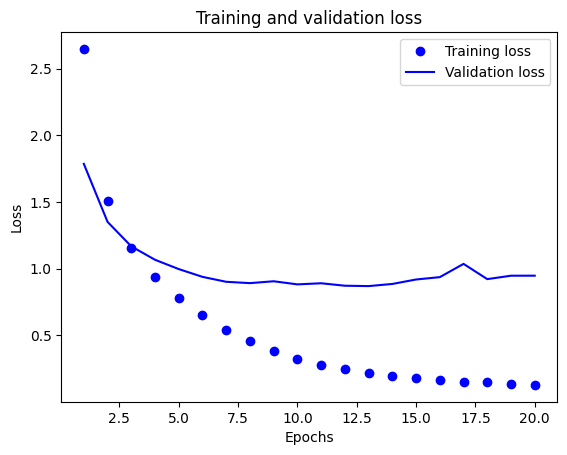

In [27]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

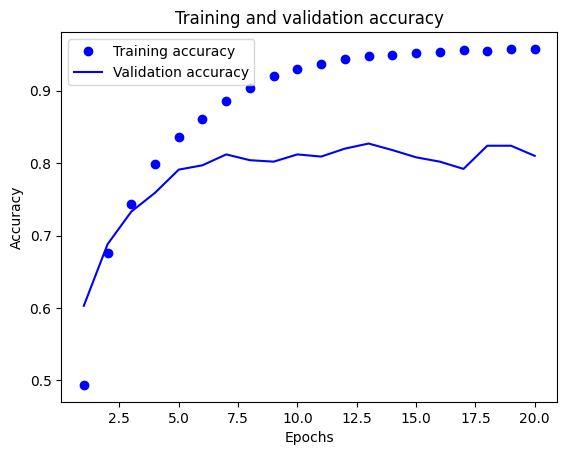

In [28]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8057 - loss: 1.0014


In [30]:
results

[1.0701923370361328, 0.7943009734153748]

In [31]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [32]:
predictions[0]

array([1.55155234e-07, 1.21404662e-06, 1.81626003e-08, 9.75677609e-01,
       2.37942375e-02, 1.89056060e-09, 4.92604268e-09, 4.97254723e-06,
       9.60452016e-05, 2.75662781e-08, 5.60984802e-07, 3.26613481e-05,
       1.10323549e-06, 8.06208482e-06, 7.00163980e-07, 3.76230336e-09,
       6.03016924e-05, 4.11883684e-06, 1.76808726e-06, 2.26395478e-05,
       2.01112809e-04, 1.24000408e-05, 2.25799135e-06, 1.62890956e-06,
       9.91280391e-09, 8.27585964e-08, 7.92947752e-09, 3.13238502e-08,
       1.07892696e-07, 8.76660067e-07, 4.12941290e-06, 2.27495457e-06,
       1.17068403e-07, 3.99768538e-07, 4.66473321e-05, 3.00006207e-07,
       2.29351667e-06, 6.15962890e-08, 2.28017836e-08, 1.80425377e-05,
       1.01083923e-08, 1.48269166e-07, 5.82077178e-07, 1.56148900e-07,
       6.70117757e-08, 1.78411819e-09], dtype=float32)

In [33]:
np.argmax(predictions[0])

3